In [1]:
# import libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# cleanng data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\ezequ\anaconda3\envs\luke_b\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_arg = df[df['job_country'] == 'Argentina'].copy()
df_arg['job_posted_month'] = df_arg['job_posted_date'].dt.strftime('%B')
df_arg_pivot = df_arg.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_arg_pivot = df_arg_pivot.reset_index()
df_arg_pivot['month_number'] = pd.to_datetime(df_arg_pivot['job_posted_month'], format='%B').dt.month
df_arg_pivot = df_arg_pivot.sort_values('month_number')
df_arg_pivot = df_arg_pivot.set_index('job_posted_month')
df_arg_pivot = df_arg_pivot.drop(columns='month_number')

df_arg_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,50,52,117,167,131,22,24,45,38,202
February,15,8,68,98,67,19,13,28,10,46
March,19,11,58,150,85,17,9,47,21,61
April,38,7,79,175,86,16,19,46,21,51
May,17,3,39,91,56,10,8,46,9,34
June,18,10,75,156,114,20,11,35,22,27
July,37,25,138,195,207,35,32,46,41,91
August,58,62,219,292,256,40,59,97,60,224
September,49,33,141,228,163,19,20,50,37,119


In [6]:
pd.read_csv("https://lukeb.co/software_csv")

,job_posted_month,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
0,January,13619,9827,5108,4348
1,February,11456,9116,7298,4284
2,March,11102,8178,5814,4159
3,April,14037,9209,7232,4220
4,May,12126,8864,6718,4980
5,June,12003,8065,5902,4781
6,July,11914,8061,6839,4344
7,August,11571,8191,7413,4104
8,September,14016,8447,6139,4094
9,October,11419,8476,5026,4389


In [8]:
pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month')

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [9]:
df_arg_software_pivot = pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month')

df_arg_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [12]:
df_arg_software_pivot = df_arg_software_pivot.div(10)

df_arg_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,136.19,98.27,51.08,43.48
February,114.56,91.16,72.98,42.84
March,111.02,81.78,58.14,41.59
April,140.37,92.09,72.32,42.20
May,121.26,88.64,67.18,49.80
June,120.03,80.65,59.02,47.81
July,119.14,80.61,68.39,43.44
August,115.71,81.91,74.13,41.04
September,140.16,84.47,61.39,40.94


In [13]:
df_arg_software_pivot = df_arg_software_pivot.astype(int)

df_arg_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,136,98,51,43
February,114,91,72,42
March,111,81,58,41
April,140,92,72,42
May,121,88,67,49
June,120,80,59,47
July,119,80,68,43
August,115,81,74,41
September,140,84,61,40


In [14]:
df_arg_pivot.merge(df_arg_software_pivot, on='job_posted_month')

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,50,52,117,167,131,22,24,45,38,202,136,98,51,43
February,15,8,68,98,67,19,13,28,10,46,114,91,72,42
March,19,11,58,150,85,17,9,47,21,61,111,81,58,41
April,38,7,79,175,86,16,19,46,21,51,140,92,72,42
May,17,3,39,91,56,10,8,46,9,34,121,88,67,49
June,18,10,75,156,114,20,11,35,22,27,120,80,59,47
July,37,25,138,195,207,35,32,46,41,91,119,80,68,43
August,58,62,219,292,256,40,59,97,60,224,115,81,74,41
September,49,33,141,228,163,19,20,50,37,119,140,84,61,40


In [18]:
df_arg_merge = df_arg_pivot.merge(df_arg_software_pivot, on='job_posted_month')

top_5 = (
    df_arg_merge
    .sum()
    .sort_values(ascending=False)
    .head()
    .index
    .to_list()
)
top_5

['Data Engineer',
 'Data Scientist',
 'Front-End Developer',
 'Data Analyst',
 'Software Engineer']

<Axes: xlabel='job_posted_month'>

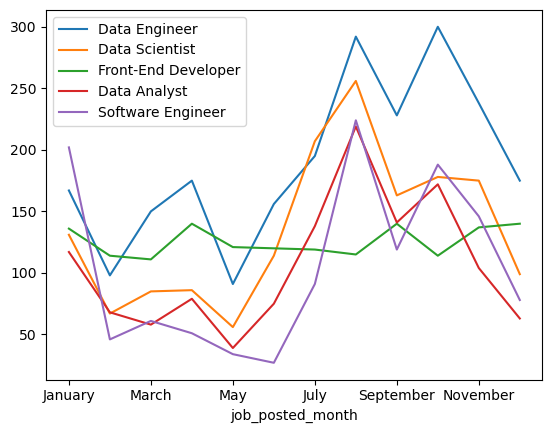

In [19]:
df_arg_merge[top_5].plot(kind='line')

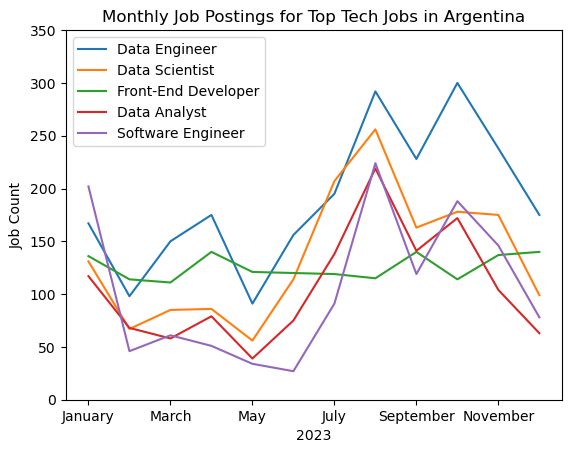

In [27]:
df_arg_merge[top_5].plot(kind='line')
plt.title('Monthly Job Postings for Top Tech Jobs in Argentina')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.ylim(0, 350)
plt.legend()
plt.show()